In [1]:
!pip install xgboost dtreeviz

     -------------------------------------- 70.9/70.9 MB 524.8 kB/s eta 0:00:00
     -------------------------------------- 91.5/91.5 kB 650.1 kB/s eta 0:00:00
     ------------------------------------ 320.5/320.5 kB 793.5 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 334.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


import the required libraries into the workplace 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [4]:
import warnings
warnings.filterwarnings("ignore")

Load the dataset into the working place

In [5]:
df=pd.read_csv("CODECLAUSE-EMAIL-DATASET.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


<AxesSubplot: >

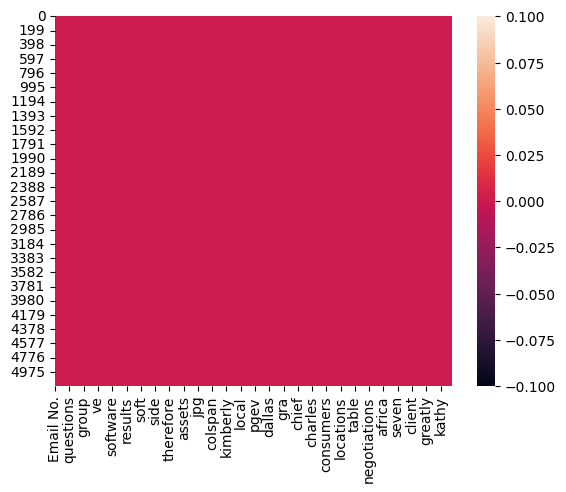

In [10]:
sb.heatmap(df.isnull())

By using df.iloc[:, 1:], the code is selecting all columns starting from the second column onward, excluding the first column. This operation effectively excludes the target variable from the input data, considering only the input features for training the classifier.

In [11]:
df=df.iloc[:,1:]

In [12]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

This will plot the unvariant distribution of observations.it creates histogram and kernet density providing a visual distribution of a single vaariable

<AxesSubplot: xlabel='Prediction', ylabel='Density'>

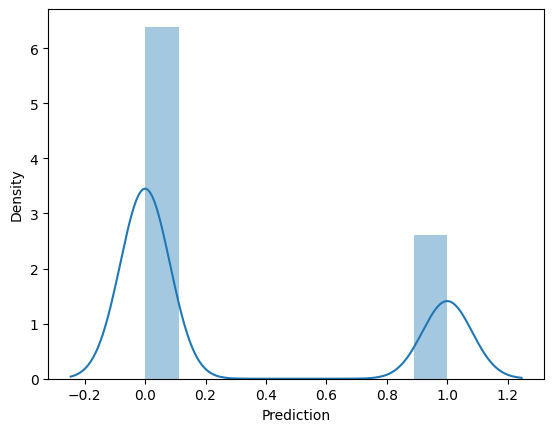

In [15]:
sb.distplot(df.Prediction)

In [21]:
X=df.iloc[:,:3000].values            #this is the feature variable which is denoted as x
X

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [22]:
Y=df.iloc[:,-1].values
Y                                    #this is the targeted variable which is denoted as y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

Now use the train_test_split method to split the dataset into training dataset and testing dataset testing will be 30 percent

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [47]:
x_train

array([[ 2,  2,  2, ...,  0,  0,  0],
       [ 4,  3,  9, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 1,  2,  2, ...,  0,  1,  0],
       [11, 11,  1, ...,  0,  1,  0],
       [14, 10,  4, ...,  0,  3,  0]], dtype=int64)

In [48]:
x_test

array([[18, 10,  2, ...,  0,  1,  0],
       [ 3,  8,  2, ...,  0,  0,  0],
       [ 2,  4, 10, ...,  0,  0,  0],
       ...,
       [ 0,  5,  3, ...,  0,  1,  0],
       [ 6, 13,  3, ...,  0,  0,  0],
       [ 0,  5,  1, ...,  0,  0,  0]], dtype=int64)

In [49]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [50]:
y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

Now we will import certain functional libraries which will measure the performance and to show the confusion matrix

In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [52]:
def perform(y_pred):
    print("Precission: ",precision_score(Y_test,Y_pred))
    print("Recall:    ",recall_score(Y_test,Y_pred))
    print("Accuracy_score: ",accuracy_score(Y_test,Y_pred))
    print("f1_score:     ",f1_score(Y_test,Y_pred))
    print("\n",confusion_matrix(Y_test,Y_pred))
    print("")

Now we will display the confusion matrix

In [53]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

NOW WE WILL VISUALIZE WITH VARIOUS ML-ALGORITHMS 

1.GAUSSIAN NAIVE BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [55]:
model_nb=GaussianNB()


In [56]:
model_nb.fit(X_train,Y_train)

GaussianNB()

In [57]:
y_prednb=model_nb.predict(X_test)

Precision :  0.9079497907949791
Recall :  0.9559471365638766
Accuracy Score :  0.9587628865979382
F1 Score :  0.9313304721030043

 [[1054   44]
 [  20  434]]



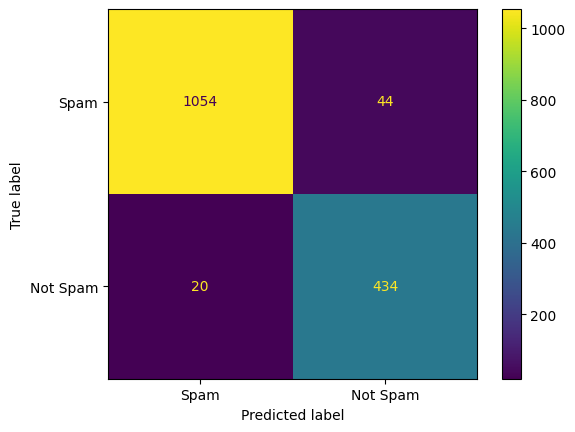

In [58]:
perform(y_prednb)

2.MULTINOMIAL NAIVEBAYES

In [64]:
model_mb=MultinomialNB()

In [65]:
model_mb.fit(x_train,y_train)

MultinomialNB()

In [66]:
y_predmb=model_mb.predict(x_test)


Precision :  0.8732394366197183
Recall :  0.9559471365638766
Accuracy Score :  0.946520618556701
F1 Score :  0.9127234490010515

 [[1035   63]
 [  20  434]]



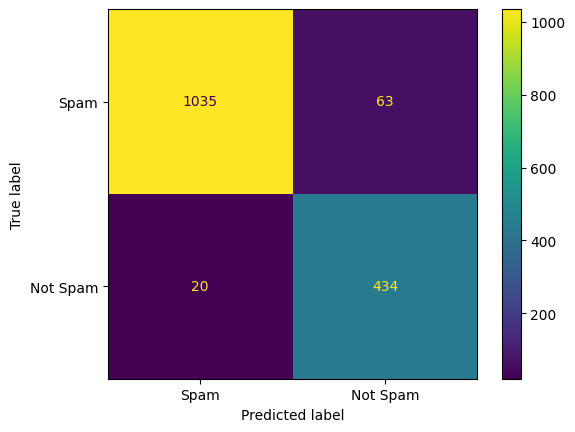

In [67]:
perform(y_predmb)

XGBOOST Classifier

In [70]:
from xgboost import XGBClassifier

In [71]:
model_xg=XGBClassifier()

In [72]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y_predxgb=model_xg.predict(x_test)

Precision :  0.960352422907489
Recall :  0.960352422907489
Accuracy Score :  0.9768041237113402
F1 Score :  0.960352422907489

 [[1080   18]
 [  18  436]]



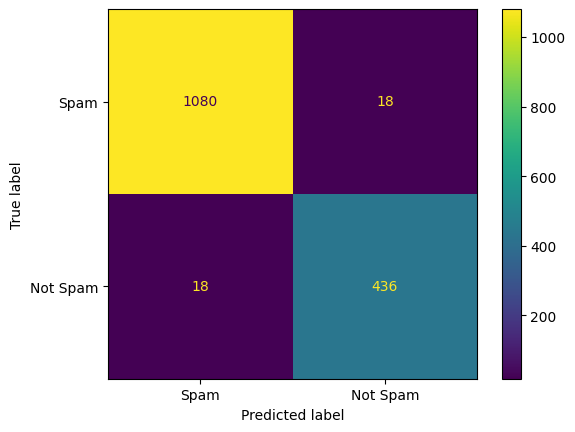

In [74]:
perform(y_predxgb)

3.DECISION TREE CLASSIFIER

In [75]:
model_dt=DecisionTreeClassifier()

In [77]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_preddt=model_dt.predict(x_test)

Precision :  0.8852097130242825
Recall :  0.8832599118942731
Accuracy Score :  0.9323453608247423
F1 Score :  0.8842337375964718

 [[1046   52]
 [  53  401]]



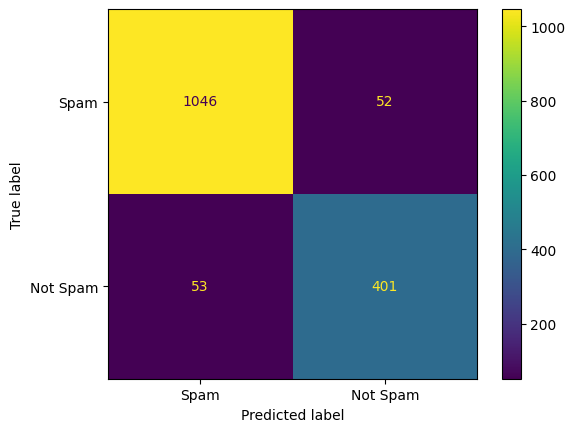

In [79]:
perform(y_preddt)

4.RANDOMFORESTCLASSIFIER

In [80]:
model_rf=RandomForestClassifier()

In [81]:
model_rf.fit(x_train,y_train)


RandomForestClassifier()

In [82]:
y_predrf=model_rf.predict(x_test)

Precision :  0.9665924276169265
Recall :  0.9559471365638766
Accuracy Score :  0.9774484536082474
F1 Score :  0.9612403100775194

 [[1083   15]
 [  20  434]]



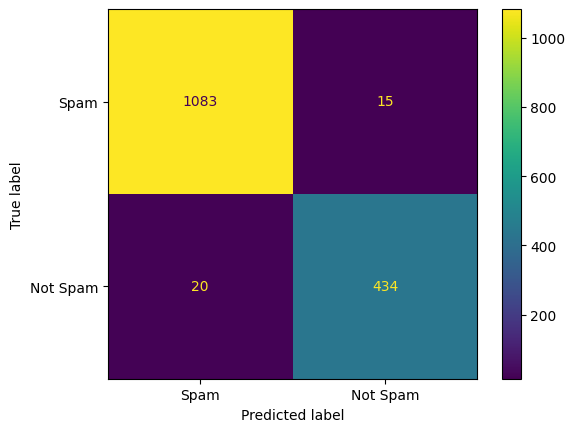

In [83]:
perform(y_predrf)

5.LOGISTICREGRESSION

In [85]:
model_lg=LogisticRegression()

In [86]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred=model_lg.predict(x_test)

Precision :  0.9366812227074236
Recall :  0.9449339207048458
Accuracy Score :  0.9652061855670103
F1 Score :  0.9407894736842105

 [[1069   29]
 [  25  429]]



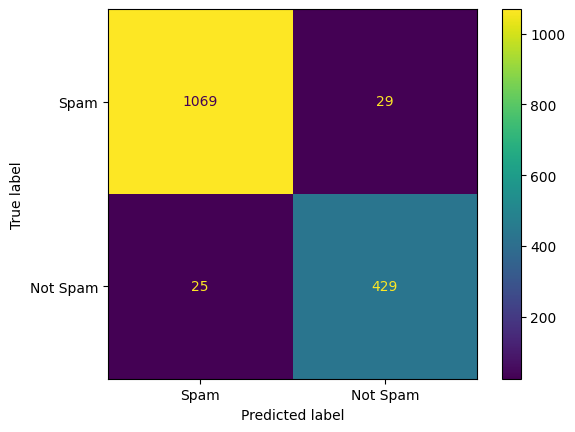

In [88]:
perform(y_pred)

6.SUPPORT VECTOR CLASSIFIER

In [89]:
model_sv=SVC()

In [90]:
model_sv.fit(x_train,y_train)

SVC()

In [91]:
y_predcsv=model_sv.predict(x_test)

Precision :  0.8541666666666666
Recall :  0.36123348017621143
Accuracy Score :  0.7951030927835051
F1 Score :  0.5077399380804953

 [[1070   28]
 [ 290  164]]



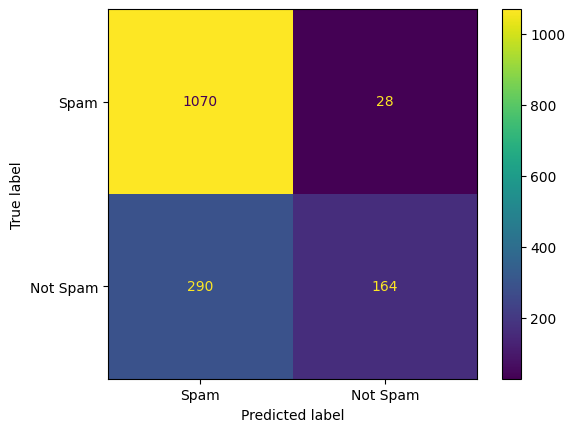

In [92]:
perform(y_predcsv)